In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split


In [21]:
#랜덤 포레스트
#Tree의 갯수 선택, 사용할 특성의 수 max_features 지정
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons #tow_moon 데이터셋

X, y = make_moons(n_samples=100,noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2) #무작위 트리 5개 생성
forest.fit(X_train, y_train)



RandomForestClassifier(n_estimators=5, random_state=2)

Text(0.5, 1.0, 'Random Forest')

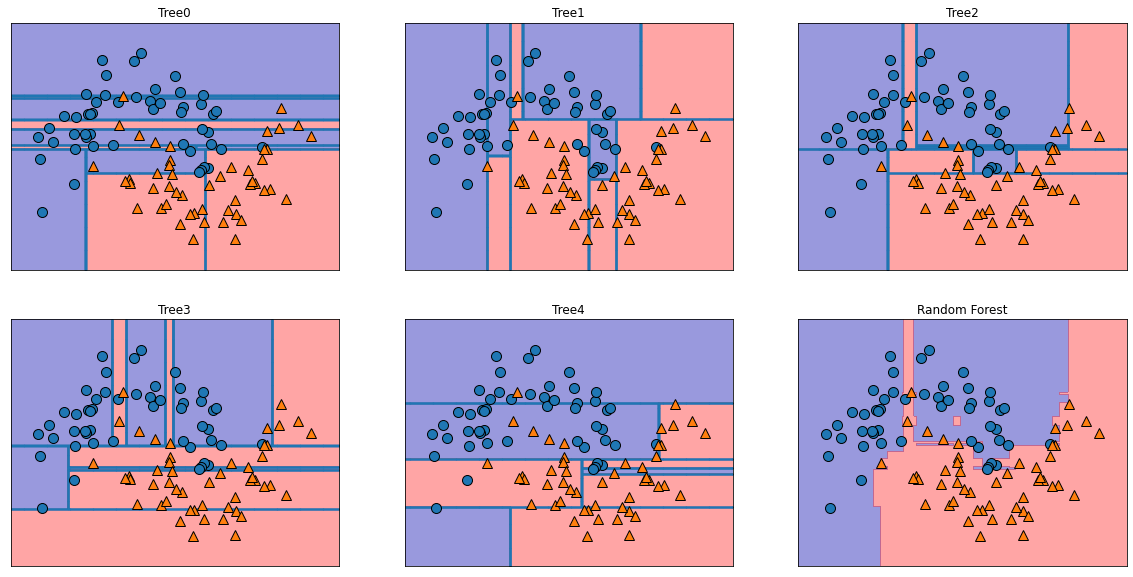

In [36]:
#시각화
fig, axes = plt.subplots(2,3,figsize=(20,10))
# print(fig)
# print(axes)
# print(axes.ravel())
# forest.estimators_
# print(enumerate(zip(axes.ravel(),forest.estimators_)))

#트리 5개 그리기
for i, (ax,tree) in enumerate(zip(axes.ravel(), forest.estimators_)): #axes: 그래프 번호, estimators: 트리 객체, i는 인덱스 번호
    ax.set_title("Tree{}".format(i))
    mglearn.plots.plot_tree_partition(X,y,tree, ax = ax)

#랜덤포레스트 그리기
mglearn.plots.plot_2d_separator(forest, X, fill = True, ax=axes[-1,-1],alpha=0.4) #마지막 [-1,-1] 위치에 분리선 표시
mglearn.discrete_scatter(X[:,0],X[:,1],y) #점표시
axes[-1,-1].set_title("Random Forest")


In [88]:
#유방암 데이터셋에 적용
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=42)

forest = RandomForestClassifier(n_estimators=100, random_state= 2).fit(X_train, y_train)
tree = DecisionTreeClassifier(random_state=2).fit(X_train,y_train)
lg = LogisticRegression(C=0.1).fit(X_train, y_train)
svm = LinearSVC(penalty='l2',C=0.1).fit(X_train,y_train)
print("RandomForest Accuracy: ",forest.score(X_test,y_test))
print("Decision Tree Accuracy: ",tree.score(X_test,y_test))
print("Logistic Accuracy: ",lg.score(X_test,y_test)) #로지스틱 회귀 사용
print("SVM Accuracy: ",svm.score(X_test,y_test)) #SVM 사용

# => 선형회귀, 결정트리, 랜덤포레스트를 비교한 결과 Linear 모델은 높거나 약간 모자란 정확도를 보이는반면
# Random Forest는 항상 높은 정확도를 보이는것을 확인



RandomForest Accuracy:  0.972027972027972
Decision Tree Accuracy:  0.9440559440559441
Logistic Accuracy:  0.972027972027972
SVM Accuracy:  0.9300699300699301


C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\wlsgh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
